In [8]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

## Load

In [9]:
iris_data = pd.read_csv('IRIS.csv', header=0)

## Preparing dataset

In [10]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [11]:
y_enc = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_enc)

C:\Users\lamzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [13]:
type(y_train)

numpy.ndarray

In [14]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [15]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


4/4 [==============================] - 3s 134ms/step - loss: 1.0203 - accuracy: 0.5714 - val_loss: 0.8092 - val_accuracy: 0.6222
Epoch 2/30
4/4 [==============================] - 0s 27ms/step - loss: 0.6741 - accuracy: 0.7143 - val_loss: 0.5542 - val_accuracy: 0.7556
Epoch 3/30
4/4 [==============================] - 0s 27ms/step - loss: 0.5157 - accuracy: 0.7143 - val_loss: 0.4836 - val_accuracy: 0.6444
Epoch 4/30
4/4 [==============================] - 0s 25ms/step - loss: 0.4161 - accuracy: 0.7905 - val_loss: 0.4161 - val_accuracy: 0.7778
Epoch 5/30
4/4 [==============================] - 0s 25ms/step - loss: 0.3282 - accuracy: 0.8952 - val_loss: 0.3464 - val_accuracy: 0.8889
Epoch 6/30
4/4 [==============================] - 0s 24ms/step - loss: 0.3318 - accuracy: 0.8857 - val_loss: 0.2815 - val_accuracy: 0.9778
Epoch 7/30
4/4 [==============================] - 0s 27ms/step - loss: 0.2761 - accuracy: 0.9143 - val_loss: 0.2353 - val_accuracy: 1.0000
Epoch 8/30
4/4 [========

In [17]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0737 - accuracy: 0.9778


[0.07370325922966003, 0.9777777791023254]

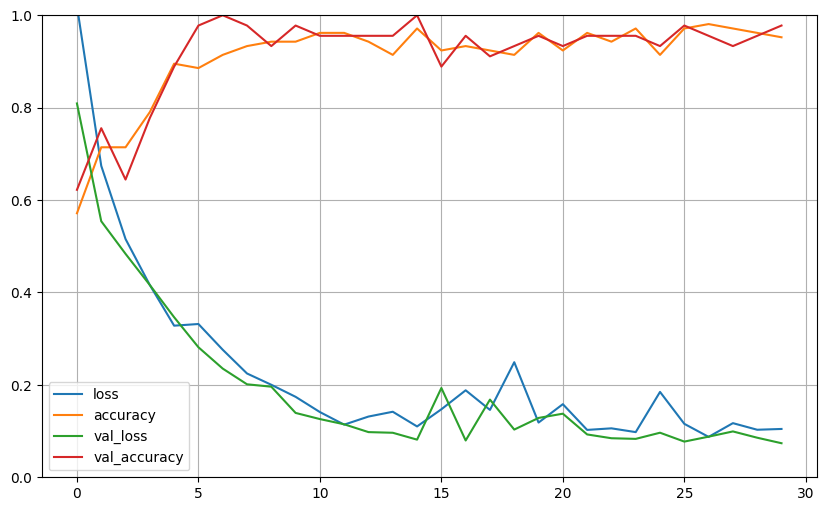

In [18]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
from dvclive import Live
from dvclive.keras import DVCLiveCallback

with Live("plots") as live:
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, callbacks=[DVCLiveCallback(live=live)])

    # Log additional data after training
    test_loss, test_acc = model.evaluate(X_test, y_test)
    live.log_metric("test_loss", test_loss, plot=False)
    live.log_metric("test_acc", test_acc, plot=False)

ImportError: cannot import name 'DEFAULT_CALLBACK' from 'fsspec.callbacks' (C:\Users\lamzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fsspec\callbacks.py)